In [2]:
#Imports

import numpy                           as np 
from sklearn    import datasets        as ds 
from sklearn    import tree            as tr 
from sklearn    import metrics         as mt 
from sklearn    import model_selection as ms 
from matplotlib import pyplot          as plt 
import pandas                          as pd

6 passos do treinamento da Decision Tree Regressor
 No algoritmo Decision Tree para problemas de regressão, a impureza dos nós é 
medida utilizando o erro quadrático médio (MSE). A redução da impureza 
acontece da seguinte forma:
 1. Primeiro, a árvore avalia qual é o melhor atributo para fazer a divisão dos 
dados em subconjuntos. Essa escolha é feita com base em qual atributo 
resultaria na maior redução do erro de predição.
 2. Após encontrar o melhor atributo, a árvore faz a divisão dos dados em 
subconjuntos com base nos valores desse atributo.
 3. Para cada subconjunto, é calculado o erro quadrático médio (MSE) entre os 
valores reais e os valores preditos.
 4. Em seguida, é calculada a impureza desse nó utilizando a média desses 
erros quadráticos médios.
 5. A árvore continua fazendo a divisão dos subconjuntos recursivamente até 
que os subconjuntos resultantes sejam puros ou até que um critério de 
parada seja atingido

LOAD DATA

In [3]:
# Training
x_trainning_data = pd.read_csv(r'C:\Users\Leticia Furletti\Repos\DATA_SCIENCE\Comunidade_Ds\MACHINE LEARNING\9-Projeto_do_aluno\ensaio_classificacao\X_training.csv')
y_trainning_data = pd.read_csv(r'C:\Users\Leticia Furletti\Repos\DATA_SCIENCE\Comunidade_Ds\MACHINE LEARNING\9-Projeto_do_aluno\ensaio_classificacao\y_training.csv')

# Validation
x_validation_data = pd.read_csv(r'C:\Users\Leticia Furletti\Repos\DATA_SCIENCE\Comunidade_Ds\MACHINE LEARNING\9-Projeto_do_aluno\ensaio_classificacao\X_validation.csv')
y_validation_data = pd.read_csv(r'C:\Users\Leticia Furletti\Repos\DATA_SCIENCE\Comunidade_Ds\MACHINE LEARNING\9-Projeto_do_aluno\ensaio_classificacao\y_validation.csv')

# Test
x_test_data = pd.read_csv(r'C:\Users\Leticia Furletti\Repos\DATA_SCIENCE\Comunidade_Ds\MACHINE LEARNING\9-Projeto_do_aluno\ensaio_classificacao\X_test.csv')
y_test_data = pd.read_csv(r'C:\Users\Leticia Furletti\Repos\DATA_SCIENCE\Comunidade_Ds\MACHINE LEARNING\9-Projeto_do_aluno\ensaio_classificacao\y_test.csv')




In [4]:
#Features selection
#Coisas similares estão próximas uma das outras, portanto, todas as suas características precisam ser númericas. (discard the ID and all binary features)

#selected features 
#features = ['age', 'class', 'flight_distance', 'inflight_wifi_service',
#            'departure_arrival_time_convenient', 'ease_of_online_booking',
#           'gate_location', 'food_and_drink', 'online_boarding', 
#            'seat_comfort', 'inflight_entertainment',
#            'on_board_service', 'leg_room_service', 
#           'departure_delay_in_minutes', 'arrival_delay_in_minutes']


features = ['id', 'customer_type', 'age', 'class', 'flight_distance',
       'inflight_wifi_service', 'departure_arrival_time_convenient',
       'ease_of_online_booking', 'gate_location', 'food_and_drink',
       'online_boarding', 'seat_comfort', 'inflight_entertainment',
       'on_board_service', 'leg_room_service', 'baggage_handling',
       'checkin_service', 'inflight_service', 'cleanliness',
       'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'gender_Female', 'gender_Male', 'type_of_travel_business_travel',
       'type_of_travel_personal_travel']


#x_trainning = x_trainning_data.loc[:,features]
#x_test = x_test_data.loc[:,features]
#x_validation = x_trainning_data.loc[:,features]

y_trainning = y_trainning_data.iloc[:, 0]
y_test   = y_test_data.iloc[:, 0]
y_validation  = y_validation_data.iloc[:, 0]



In [36]:
x_test_data.head(5)

,id,customer_type,age,class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,...,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,gender_Female,gender_Male,type_of_travel_business_travel,type_of_travel_personal_travel
0,19556,1,0.576923,0.0,0.026050,1.0,0.8,0.6,0.8,0.6,...,1.00,0.25,1.0,1.0,0.049164,0.043521,1.0,0.0,1.0,0.0
1,90035,1,0.371795,1.0,0.571890,0.2,0.2,0.6,0.2,1.0,...,0.75,0.50,0.8,1.0,0.000000,0.000000,1.0,0.0,1.0,0.0
2,12360,0,0.166667,0.0,0.032512,0.4,0.0,0.4,0.8,0.4,...,0.50,0.25,0.4,0.4,0.000000,0.000000,0.0,1.0,1.0,0.0
3,77959,1,0.474359,1.0,0.675687,0.0,0.0,0.0,0.4,0.6,...,0.00,0.50,0.2,0.8,0.000000,0.005935,0.0,1.0,1.0,0.0
4,36875,1,0.538462,0.0,0.232431,0.4,0.6,0.8,0.6,0.8,...,0.25,0.75,0.4,0.8,0.000000,0.019782,1.0,0.0,1.0,0.0


In [33]:
y_test

0        1
1        1
2        0
3        1
4        1
        ..
25888    0
25889    1
25890    0
25891    1
25892    0
Name: 0, Length: 25893, dtype: int64

Classification - Trainning

In [5]:
# Define and Fit Model
DecisionTree = tr.DecisionTreeClassifier(max_depth=3) #controle o tamanho máximo das quebras, ou seja, o tamanho máximo do crescimento da árvore ou ainda o número de recortes espaciais.
DecisionTree.fit(x_trainning_data, y_trainning) #.fit é aplicado sobre os dados de treino

# Predict
y_pred = DecisionTree.predict(x_trainning_data)

In [6]:
#Performance's analysis
# Confusion Matrix 
confusion_matrix = mt.confusion_matrix( y_trainning, y_pred ) 
print(f"confusion matrix is:")
print(confusion_matrix)

#accuracy
accuracy = mt.accuracy_score(y_trainning,y_pred)
print(f"accuracy is: {accuracy}")

#Precisão é o número de acertos a cada tentativa
#Recall é de todas as possibilidades de acerto, quantas você conseguiu acertar
#precision
precision= mt.precision_score( y_trainning, y_pred) 
print(f"precision is: {precision}")

#Recall
recall= mt.recall_score( y_trainning, y_pred) 
print(f"recall is: {recall}")

#F1_Score (um unico número que representa precision e recall)
f1_score = mt.f1_score(y_trainning,y_pred)
print(f"f1_score is: {f1_score}")

confusion matrix is:
[[35644  5443]
 [ 2957 28471]]
accuracy is: 0.8841618975384403
precision is: 0.8395058088105207
recall is: 0.9059119256713758
f1_score is: 0.8714456245600074


Classification - Validation

In [7]:
# Define and Fit Model
DecisionTree = tr.DecisionTreeClassifier(max_depth=42) #controle o tamanho máximo das quebras, ou seja, o tamanho máximo do crescimento da árvore ou ainda o número de recortes espaciais.
DecisionTree.fit(x_trainning_data, y_trainning) #.fit é aplicado sobre os dados de treino

# Predict
y_pred_validation = DecisionTree.predict(x_validation_data)

In [8]:
#Performance's analysis
# Confusion Matrix 
confusion_matrix = mt.confusion_matrix( y_validation, y_pred_validation ) 
print(f"confusion matrix is:")
print(confusion_matrix)

#accuracy
accuracy = mt.accuracy_score( y_validation, y_pred_validation)
print(f"accuracy is: {accuracy}")

#Precisão é o número de acertos a cada tentativa
#Recall é de todas as possibilidades de acerto, quantas você conseguiu acertar
#precision
precision= mt.precision_score(  y_validation, y_pred_validation) 
print(f"precision is: {precision}")

#Recall
recall= mt.recall_score(  y_validation, y_pred_validation) 
print(f"recall is: {recall}")

#F1_Score (um unico número que representa precision e recall)
f1_score = mt.f1_score( y_validation, y_pred_validation)
print(f"f1_score is: {f1_score}")

confusion matrix is:
[[16728   882]
 [  815 12654]]
accuracy is: 0.9453972135525596
precision is: 0.9348404255319149
recall is: 0.939490682307521
f1_score is: 0.9371597852249584


Hyperparameters Fine Tunning

In [27]:
#Código variando valores de K até obter oque proporcione os melhores resultados 



max_depth=  [i for i in range( 1,60 )]  #coloco o conjunto de numero que quero testar max_depth = [1,5,4,6,8] 
best_max_depth = 0
best_F1 = 0
best_Precision = 0
best_Recall = 0
f1_list = list()
accuracy_list = list()
precision_list = list()
recall_list = list()

for i in max_depth:

    DecisionTree = tr.DecisionTreeClassifier(max_depth=i)
    DecisionTree.fit(x_trainning_data, y_trainning)
    y_pred_fine_tunning = DecisionTree.predict(x_validation_data)
    #Performance's analysis
    # Confusion Matrix 
    confusion_matrix = mt.confusion_matrix( y_validation, y_pred_fine_tunning ) 

    #accuracy
    accuracy = mt.accuracy_score(y_validation, y_pred_fine_tunning)


    #Precisão é o número de acertos a cada tentativa
    #Recall é de todas as possibilidades de acerto, quantas você conseguiu acertar
    #precision
    precision= mt.precision_score( y_validation, y_pred_fine_tunning) 

    #Recall
    recall= mt.recall_score( y_validation, y_pred_fine_tunning) 

    #F1_Score (um unico número que representa precision e recall)
    f1_score = mt.f1_score(y_validation, y_pred_fine_tunning)
    
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1_score)

    if recall > best_Recall:
        best_Recall = recall

    if precision > best_Precision:
        best_Precision = precision

    if f1_score > best_F1:
        best_F1 = f1_score
        best_max_depth = i
        DecisionTree_bestClassifier = DecisionTree

# Show best result:
print(f"BEST K: {best_max_depth}")


BEST K: 14


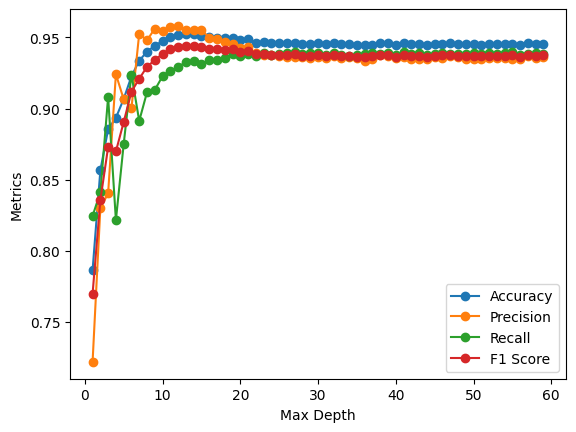

In [29]:
# Plot results
plt.plot(max_depth, accuracy_list, marker="o", label="Accuracy")
plt.plot(max_depth, precision_list, marker="o", label="Precision")
plt.plot(max_depth, recall_list, marker="o", label="Recall")
plt.plot(max_depth, f1_list, marker="o", label="F1 Score")
plt.xlabel("Max Depth")
plt.ylabel("Metrics")
plt.legend()
#plt.hlines( 0.95, 0, 1, color='b', linestyle='--' )
#plt.hlines( 0.68, 0, 1, color='g', linestyle='--' )

Classification - Test

Usando agora o melhor parametro

In [31]:
# Define and Fit Model
DecisionTree = tr.DecisionTreeClassifier(max_depth=best_max_depth) #controle o tamanho máximo das quebras, ou seja, o tamanho máximo do crescimento da árvore ou ainda o número de recortes espaciais.
DecisionTree.fit(x_trainning_data, y_trainning) #.fit é aplicado sobre os dados de treino

# Predict
y_pred_test = DecisionTree.predict(x_test_data)

In [32]:
#Performance's analysis
# Confusion Matrix 
confusion_matrix = mt.confusion_matrix( y_test, y_pred_test ) 
print(f"confusion matrix is:")
print(confusion_matrix)

#accuracy
accuracy = mt.accuracy_score( y_test,y_pred_test)
print(f"accuracy is: {accuracy}")

#Precisão é o número de acertos a cada tentativa
#Recall é de todas as possibilidades de acerto, quantas você conseguiu acertar
#precision
precision= mt.precision_score( y_test, y_pred_test) 
print(f"precision is: {precision}")

#Recall
recall= mt.recall_score(  y_test, y_pred_test) 
print(f"recall is: {recall}")

#F1_Score (um unico número que representa precision e recall)
f1_score = mt.f1_score( y_test, y_pred_test)
print(f"f1_score is: {f1_score}")

confusion matrix is:
[[14008   520]
 [  719 10646]]
accuracy is: 0.9521492295214923
precision is: 0.953430055525703
recall is: 0.9367355917289926
f1_score is: 0.9450090985752961
